# This is the first of three Notebooks used for the Data Science Capstone project

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')

print('Libraries imported.')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

##  Data found on Wikepida with reference: United States Department of Justice, Federal Bureau of Investigation. Crime in the United States, 2012, Table 8 (California). Retrieved November 14, 2013.


In [2]:
OC_df = pd.read_csv('OC_Cities_Crime.csv')
OC_df.head()

,City,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate
0,Aliso Viejo,48999,43,0.88,415,8.47
1,Anaheim,344526,1279,3.71,10070,29.23
2,Brea,40253,74,1.84,1292,32.10
3,Buena Park,82505,206,2.50,2066,25.04
4,Costa Mesa,112635,254,2.26,4079,36.21


## Map or graph based on population

In [3]:
OC_tst = OC_df 

In [4]:
OC_tst.shape

(34, 6)

In [5]:
OC_tst = OC_tst.assign(latitude=None)
OC_tst = OC_tst.assign(longtitude=None)

OC_tst['latitude'] = OC_tst['latitude'].astype(float)
OC_tst['longtitude'] = OC_tst['longtitude'].astype(float)


In [6]:
CLIENT_ID = 'JA3ZQ4KFLYQCRCFYD3ZXFDVEK1UQ35XSB3ALUYE4MBHR51LT' # your Foursquare ID
CLIENT_SECRET = '2V1555ECNFL4DY0YQ5UBAJPO1HMIK0TKF3GB3QJ04WXMJQ1W' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JA3ZQ4KFLYQCRCFYD3ZXFDVEK1UQ35XSB3ALUYE4MBHR51LT
CLIENT_SECRET:2V1555ECNFL4DY0YQ5UBAJPO1HMIK0TKF3GB3QJ04WXMJQ1W


# Geolocator for LL - and test API call

In [7]:
address = 'IRVINE, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

33.6856969 -117.8259819


In [8]:
search_query = 'Starbucks'
radius = 50000
print(search_query + ' .... OK!')

Starbucks .... OK!


In [9]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JA3ZQ4KFLYQCRCFYD3ZXFDVEK1UQ35XSB3ALUYE4MBHR51LT&client_secret=2V1555ECNFL4DY0YQ5UBAJPO1HMIK0TKF3GB3QJ04WXMJQ1W&ll=33.6856969,-117.8259819&v=20180604&query=Starbucks&radius=50000&limit=500'

In [11]:
results = requests.get(url).json()


In [12]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(1)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b2e914bf964a520a3e224e3,38 Prism,US,Irvine,United States,NaN,7874,"[38 Prism, Irvine, CA 92618, United States]","[{'label': 'display', 'lat': 33.653185, 'lng':...",33.653185,-117.750499,NaN,92618,CA,Starbucks,v-1556124992


In [13]:
dataframe.shape

(50, 18)

## Function for getting categories

In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]



In [15]:
OC_df.head()

,City,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate
0,Aliso Viejo,48999,43,0.88,415,8.47
1,Anaheim,344526,1279,3.71,10070,29.23
2,Brea,40253,74,1.84,1292,32.10
3,Buena Park,82505,206,2.50,2066,25.04
4,Costa Mesa,112635,254,2.26,4079,36.21


# Test the loop for going through each city

In [41]:
for i, row in OC_df.iterrows():
    print(row['City'])

Aliso Viejo
Anaheim
Brea
Buena Park
Costa Mesa
Cypress
Dana Point
Fountain Valley
Fullerton
Garden Grove
Huntington Beach
Irvine
Laguna Beach
Laguna Hills
Laguna Niguel
Laguna Woods
La Habra
Lake Forest
La Palma
Los Alamitos
Mission Viejo
Newport Beach
Orange
Placentia
Rancho Santa Margarita
San Clemente
San Juan Capistrano
Santa Ana
Seal Beach
Stanton
Tustin
Villa Park
Westminster
Yorba Linda


In [17]:
dfc = dataframe.loc[:, ['id', 'location.address', 'location.city','name']]

In [254]:
dataframe.loc[:, ['id', 'location.address', 'location.city','name']]

In [41]:
dfc = dfc[0:0]  # This empties the dataframe but keeps the structure

In [42]:
dfc

,id,location.address,location.city,name


In [43]:
dfc.shape

(0, 4)

# Here is where we setup a loop to go through the cities in the list to get all Starbucks, save for each city to dfc and aggregate

In [44]:
for i, row in OC_df.iterrows():
    dfcur = None
    print(row['City'])
    address = row['City'] + ', California'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    search_query = 'Starbucks'
    radius = 10000
    print(search_query + ' .... OK!')
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    url
    results = requests.get(url).json()
    #results
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dfcur = dataframe.loc[dataframe['location.city'].str.strip()==row['City']]
    dfcur = dataframe.loc[:, ['id', 'location.address', 'location.city','name']]
    dfc = pd.concat([dfc, dfcur], ignore_index=True)
    #df_cons.shape



Aliso Viejo
33.5761376 -117.7258122
Starbucks .... OK!
Anaheim
33.8347516 -117.911732
Starbucks .... OK!
Brea
33.9170444 -117.8888557
Starbucks .... OK!
Buena Park
33.870413 -117.9962165
Starbucks .... OK!
Costa Mesa
33.6633386 -117.903317
Starbucks .... OK!
Cypress
33.8248235 -118.0399368
Starbucks .... OK!
Dana Point
33.4669721 -117.6981075
Starbucks .... OK!
Fountain Valley
33.7038145 -117.9627349
Starbucks .... OK!
Fullerton
33.8708215 -117.9294165
Starbucks .... OK!
Garden Grove
33.7746292 -117.9463717
Starbucks .... OK!
Huntington Beach
33.6783336 -118.0000166
Starbucks .... OK!
Irvine
33.6856969 -117.8259819
Starbucks .... OK!
Laguna Beach
33.5420888 -117.7834147
Starbucks .... OK!
Laguna Hills
33.5948758 -117.6882067
Starbucks .... OK!
Laguna Niguel
33.5225261 -117.7075526
Starbucks .... OK!
Laguna Woods
33.6106076 -117.7249722
Starbucks .... OK!
La Habra
33.9330156 -117.944777
Starbucks .... OK!
Lake Forest
33.6469261 -117.6859213
Starbucks .... OK!
La Palma
33.846404 -118.046

In [45]:
dfc.shape

(1651, 4)

In [46]:
dfc.head()

,id,location.address,location.city,name
0,4b2e914bf964a520a3e224e3,38 Prism,Irvine,Starbucks
1,4b4e6d97f964a5206bed26e3,27020 Alicia Pkwy,Laguna Niguel,Starbucks
2,4ac8ea1cf964a52045bd20e3,23411 Aliso Viejo Pkwy,Aliso Viejo,Starbucks
3,4bca132a511f9521d5f5aec7,27072 La Paz Rd,Aliso Viejo,Starbucks
4,4b3bc69df964a520e97a25e3,28391 Marguerite Pkwy,Mission Viejo,Starbucks


In [150]:
# dfc.to_csv('Starbucks_out.csv')

#  Save dataframe to csv to avoid having to recall the foursquare API too many times

In [31]:
type(dfc)


pandas.core.frame.DataFrame

## Address duplicates - just base on ID

In [47]:
SB_df = dfc

In [48]:
SB_df = SB_df[['id','location.address','location.city','name']].drop_duplicates()

In [49]:
SB_df.shape

(340, 4)

In [35]:
# SB_df.to_csv('Starbucks_out_no_dups_2.csv')

In [50]:
df_SB_Count = SB_df.groupby(['location.city']).size()

In [52]:
df_SB_Count.head(40)

location.city
Aliso Viejo              7
Anaheim                 25
Anaheim Hills            1
Artesia                  1
Bellflower               2
Brea                     9
Buena Park               6
Cerritos                 3
Corona del Mar           2
Costa Mesa              16
Cypress                  3
Dana Point               5
Diamond Bar              3
Foothill Ranch           3
Fountain Valley          5
Fullerton               16
Garden Grove            10
Hacienda Heights         2
Hawaiian Gardens         1
Huntington Beach        17
Industry                 2
Irvine                  23
La Habra                 6
La Mirada                2
Ladera Ranch             3
Laguna Beach             3
Laguna Hills             5
Laguna Niguel            6
Laguna Woods             3
Lake Forest              7
Lakewood                 5
Long Beach              17
Los Alamitos             1
Mission Viejo           15
Newport Beach           15
Newport Coast            2
Norwalk       

# This is where we group by to get the counts by city

In [53]:
#Group by City and add counts - return as dataframe
df_Sum = SB_df.groupby(['location.city']).size().reset_index(name='counts') #, as_index=True).size()


In [54]:
df_Sum.shape

(54, 2)

In [55]:
df_Sum.head()

,location.city,counts
0,Aliso Viejo,7
1,Anaheim,25
2,Anaheim Hills,1
3,Artesia,1
4,Bellflower,2


In [56]:
df_Sum.rename(columns={'location.city':'City', 'counts':'StarBucks_Count'}, inplace=True)


In [57]:
df_Sum.head()

,City,StarBucks_Count
0,Aliso Viejo,7
1,Anaheim,25
2,Anaheim Hills,1
3,Artesia,1
4,Bellflower,2


# Merge with the Crime data 

In [58]:
#pd.merge(df_new, df_n, on='subject_id')
df_comb = pd.merge(df_Sum, OC_df, on='City')

In [59]:
df_comb

,City,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate
0,Aliso Viejo,7,48999,43,0.88,415,8.47
1,Anaheim,25,344526,1279,3.71,10070,29.23
2,Brea,9,40253,74,1.84,1292,32.10
3,Buena Park,6,82505,206,2.50,2066,25.04
4,Costa Mesa,16,112635,254,2.26,4079,36.21
5,Cypress,3,48976,56,1.14,1018,20.79
6,Dana Point,5,34172,65,1.90,604,17.68
7,Fountain Valley,5,56674,106,1.87,1469,25.92
8,Fullerton,16,138455,452,3.26,3937,28.44
9,Garden Grove,10,175079,439,2.51,4017,22.94


In [60]:
#example code to add two columns and set to float

df_comb = df_comb.assign(latitude=None)
df_comb = df_comb.assign(longtitude=None)

df_comb['latitude'] = df_comb['latitude'].astype(float)
df_comb['longtitude'] = df_comb['longtitude'].astype(float)


In [65]:
#f_comb.drop(['longitude'], axis=1, inplace=True)

In [62]:
#example use this loop to set lat and long 
#add in lat and long 

for i, row in df_comb.iterrows():
    print(row['City'])
    address = row['City'] + ', California'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    df_comb.loc[df_comb['City'] == row['City'], 'latitude'] = latitude
    df_comb.loc[df_comb['City'] == row['City'], 'longtitude'] = longitude

Aliso Viejo
33.5761376 -117.7258122
Anaheim
33.8347516 -117.911732
Brea
33.9170444 -117.8888557
Buena Park
33.870413 -117.9962165
Costa Mesa
33.6633386 -117.903317
Cypress
33.8248235 -118.0399368
Dana Point
33.4669721 -117.6981075
Fountain Valley
33.7038145 -117.9627349
Fullerton
33.8708215 -117.9294165
Garden Grove
33.7746292 -117.9463717
Huntington Beach
33.6783336 -118.0000166
Irvine
33.6856969 -117.8259819
La Habra
33.9330156 -117.944777
Laguna Beach
33.5420888 -117.7834147
Laguna Hills
33.5948758 -117.6882067
Laguna Niguel
33.5225261 -117.7075526
Laguna Woods
33.6106076 -117.7249722
Lake Forest
33.6469261 -117.6859213
Los Alamitos
33.8038865 -118.0772433
Mission Viejo
33.5965685 -117.659405
Newport Beach
33.6170092 -117.9294401
Orange
33.7500378 -117.8704931
Placentia
33.8714814 -117.8617337
Rancho Santa Margarita
33.6408845 -117.6029341
San Clemente
33.4270275 -117.6124179
San Juan Capistrano
33.5016932 -117.6625509
Santa Ana
33.7494951 -117.8732213
Seal Beach
33.7423967 -118.105

In [63]:
df_comb

,City,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude
0,Aliso Viejo,7,48999,43,0.88,415,8.47,33.576138,-117.725812
1,Anaheim,25,344526,1279,3.71,10070,29.23,33.834752,-117.911732
2,Brea,9,40253,74,1.84,1292,32.10,33.917044,-117.888856
3,Buena Park,6,82505,206,2.50,2066,25.04,33.870413,-117.996217
4,Costa Mesa,16,112635,254,2.26,4079,36.21,33.663339,-117.903317
5,Cypress,3,48976,56,1.14,1018,20.79,33.824824,-118.039937
6,Dana Point,5,34172,65,1.90,604,17.68,33.466972,-117.698108
7,Fountain Valley,5,56674,106,1.87,1469,25.92,33.703815,-117.962735
8,Fullerton,16,138455,452,3.26,3937,28.44,33.870821,-117.929417
9,Garden Grove,10,175079,439,2.51,4017,22.94,33.774629,-117.946372


# This is the file we will use to map and coorelate Starbucks and Crime

In [64]:
df_comb.to_csv('OC_Crime_Starbucksv2.csv')

# PART 2 

# Here is where we setup a loop to go through the cities in the list to get all SUSHI, save for each city to dfc and aggregate

In [15]:
for i, row in OC_df.iterrows():
    dfcur = None
    print(row['City'])
    address = row['City'] + ', California'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    search_query = 'Sushi'
    radius = 10000
    print(search_query + ' .... OK!')
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    url
    results = requests.get(url).json()
    #results
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dfcur = dataframe.loc[dataframe['location.city'].str.strip()==row['City']]
    dfcur = dataframe.loc[:, ['id', 'location.address', 'location.city','name']]
    dfc = pd.concat([dfc, dfcur], ignore_index=True)
    #df_cons.shape



Aliso Viejo
33.5761376 -117.7258122
Sushi .... OK!
Anaheim
33.8347516 -117.911732
Sushi .... OK!
Brea
33.9170444 -117.8888557
Sushi .... OK!
Buena Park
33.870413 -117.9962165
Sushi .... OK!
Costa Mesa
33.6633386 -117.903317
Sushi .... OK!
Cypress
33.8248235 -118.0399368
Sushi .... OK!
Dana Point
33.4669721 -117.6981075
Sushi .... OK!
Fountain Valley
33.7038145 -117.9627349
Sushi .... OK!
Fullerton
33.8708215 -117.9294165
Sushi .... OK!
Garden Grove
33.7746292 -117.9463717
Sushi .... OK!
Huntington Beach
33.6783336 -118.0000166
Sushi .... OK!
Irvine
33.6856969 -117.8259819
Sushi .... OK!
Laguna Beach
33.5420888 -117.7834147
Sushi .... OK!
Laguna Hills
33.5948758 -117.6882067
Sushi .... OK!
Laguna Niguel
33.5225261 -117.7075526
Sushi .... OK!
Laguna Woods
33.6106076 -117.7249722
Sushi .... OK!
La Habra
33.9330156 -117.944777
Sushi .... OK!
Lake Forest
33.6469261 -117.6859213
Sushi .... OK!
La Palma
33.846404 -118.0467306
Sushi .... OK!
Los Alamitos
33.8038865 -118.0772433
Sushi .... OK!


In [16]:
dfc.shape

(1660, 4)

In [41]:
dfc.head(2)

,id,location.address,location.city,name
0,4b15e4f4f964a5205db523e3,27301 La Paz Rd. Ste A,Laguna Niguel,Sango Sushi
1,4b9c668bf964a520e66536e3,26601 Aliso Creek Rd Ste A,Aliso Viejo,Kanpai Sushi


In [18]:
dfc.to_csv('Sushi_out_v2.csv')

#  Save dataframe to csv to avoid having to recall the foursquare API too many times

In [270]:
type(dfc)


pandas.core.frame.DataFrame

## Address duplicates - just base on ID

In [19]:
SB_df = dfc

In [20]:
SB_df = SB_df[['id','location.address','location.city','name']].drop_duplicates()

In [21]:
SB_df.shape

(453, 4)

In [22]:
SB_df.to_csv('Sushi_out_no_dups_v2.csv')


In [23]:
df_SB_Count = SB_df.groupby(['location.city']).size()

In [24]:
df_SB_Count.head(2)

location.city
Aliso Viejo     3
Anaheim        17
dtype: int64

# This is where we group by to get the counts by city

In [25]:
#Group by City and add counts - return as dataframe
df_Sum = SB_df.groupby(['location.city']).size().reset_index(name='counts') #, as_index=True).size()


In [26]:
df_Sum.shape

(55, 2)

In [27]:
df_Sum.head()

,location.city,counts
0,Aliso Viejo,3
1,Anaheim,17
2,Anaheim-Santa Ana-Garden Grove,1
3,Artesia,2
4,Bellflower,2


In [28]:
df_Sum.rename(columns={'location.city':'City', 'counts':'Sushi_Count'}, inplace=True)


In [29]:
df_Sum.head()

,City,Sushi_Count
0,Aliso Viejo,3
1,Anaheim,17
2,Anaheim-Santa Ana-Garden Grove,1
3,Artesia,2
4,Bellflower,2


In [31]:
OCSB_df = pd.read_csv('OC_Crime_Starbucksv2.csv')
OCSB_df.head()

,Unnamed: 0,City,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude
0,0,Aliso Viejo,7,48999,43,0.88,415,8.47,33.576138,-117.725812
1,1,Anaheim,25,344526,1279,3.71,10070,29.23,33.834752,-117.911732
2,2,Brea,9,40253,74,1.84,1292,32.10,33.917044,-117.888856
3,3,Buena Park,6,82505,206,2.50,2066,25.04,33.870413,-117.996217
4,4,Costa Mesa,16,112635,254,2.26,4079,36.21,33.663339,-117.903317


# Merge with the Crime data 

In [32]:
#pd.merge(df_new, df_n, on='subject_id')
df_comb = pd.merge(df_Sum, OCSB_df, on='City')

In [33]:
df_comb

,City,Sushi_Count,Unnamed: 0,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude
0,Aliso Viejo,3,0,7,48999,43,0.88,415,8.47,33.576138,-117.725812
1,Anaheim,17,1,25,344526,1279,3.71,10070,29.23,33.834752,-117.911732
2,Brea,10,2,9,40253,74,1.84,1292,32.10,33.917044,-117.888856
3,Buena Park,16,3,6,82505,206,2.50,2066,25.04,33.870413,-117.996217
4,Costa Mesa,30,4,16,112635,254,2.26,4079,36.21,33.663339,-117.903317
5,Cypress,10,5,3,48976,56,1.14,1018,20.79,33.824824,-118.039937
6,Dana Point,5,6,5,34172,65,1.90,604,17.68,33.466972,-117.698107
7,Fountain Valley,9,7,5,56674,106,1.87,1469,25.92,33.703815,-117.962735
8,Fullerton,21,8,16,138455,452,3.26,3937,28.44,33.870822,-117.929417
9,Garden Grove,16,9,10,175079,439,2.51,4017,22.94,33.774629,-117.946372


In [34]:
#example code to add two columns and set to float

df_comb = df_comb.assign(latitude=None)
df_comb = df_comb.assign(longtitude=None)

df_comb['latitude'] = df_comb['latitude'].astype(float)
df_comb['longtitude'] = df_comb['longtitude'].astype(float)


In [40]:
#df_comb.drop(['longitude'], axis=1, inplace=True)

In [37]:
#example use this loop to set lat and long 
#add in lat and long 

for i, row in df_comb.iterrows():
    print(row['City'])
    address = row['City'] + ', California'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    df_comb.loc[df_comb['City'] == row['City'], 'latitude'] = latitude
    df_comb.loc[df_comb['City'] == row['City'], 'longtitude'] = longitude

Aliso Viejo
33.5761376 -117.7258122
Anaheim
33.8347516 -117.911732
Brea
33.9170444 -117.8888557
Buena Park
33.870413 -117.9962165
Costa Mesa
33.6633386 -117.903317
Cypress
33.8248235 -118.0399368
Dana Point
33.4669721 -117.6981075
Fountain Valley
33.7038145 -117.9627349
Fullerton
33.8708215 -117.9294165
Garden Grove
33.7746292 -117.9463717
Huntington Beach
33.6783336 -118.0000166
Irvine
33.6856969 -117.8259819
La Habra
33.9330156 -117.944777
Laguna Beach
33.5420888 -117.7834147
Laguna Hills
33.5948758 -117.6882067
Laguna Niguel
33.5225261 -117.7075526
Laguna Woods
33.6106076 -117.7249722
Lake Forest
33.6469261 -117.6859213
Los Alamitos
33.8038865 -118.0772433
Mission Viejo
33.5965685 -117.659405
Newport Beach
33.6170092 -117.9294401
Orange
33.7500378 -117.8704931
Placentia
33.8714814 -117.8617337
Rancho Santa Margarita
33.6408845 -117.6029341
San Clemente
33.4270275 -117.6124179
San Juan Capistrano
33.5016932 -117.6625509
Santa Ana
33.7494951 -117.8732213
Seal Beach
33.7423967 -118.105

In [38]:
df_comb

,City,Sushi_Count,Unnamed: 0,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude
0,Aliso Viejo,3,0,7,48999,43,0.88,415,8.47,33.576138,-117.725812
1,Anaheim,17,1,25,344526,1279,3.71,10070,29.23,33.834752,-117.911732
2,Brea,10,2,9,40253,74,1.84,1292,32.10,33.917044,-117.888856
3,Buena Park,16,3,6,82505,206,2.50,2066,25.04,33.870413,-117.996217
4,Costa Mesa,30,4,16,112635,254,2.26,4079,36.21,33.663339,-117.903317
5,Cypress,10,5,3,48976,56,1.14,1018,20.79,33.824824,-118.039937
6,Dana Point,5,6,5,34172,65,1.90,604,17.68,33.466972,-117.698108
7,Fountain Valley,9,7,5,56674,106,1.87,1469,25.92,33.703815,-117.962735
8,Fullerton,21,8,16,138455,452,3.26,3937,28.44,33.870821,-117.929417
9,Garden Grove,16,9,10,175079,439,2.51,4017,22.94,33.774629,-117.946372


# This is the file we will use to map and coorelate Starbucks and Crime

In [39]:
df_comb.to_csv('OC_Crime_Starbucks_Sushi.csv')

# Part 3 Data Analysis

# This is the third notebook in the Capstone project.  Using the dataframes created in the first two, I will map and analyze the results

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib as plt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


import folium


In [3]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [4]:
df_Load = pd.read_csv('OC_Crime_Starbucks_Sushi.csv')
df_Load.head(9)

,Unnamed: 0,City,Sushi_Count,Unnamed: 0.1,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude
0,0,Aliso Viejo,3,0,7,48999,43,0.88,415,8.47,33.576138,-117.725812
1,1,Anaheim,12,1,32,344526,1279,3.71,10070,29.23,33.834752,-117.911732
2,2,Brea,10,2,11,40253,74,1.84,1292,32.10,33.917044,-117.888856
3,3,Buena Park,17,3,7,82505,206,2.50,2066,25.04,33.870413,-117.996217
4,4,Costa Mesa,31,4,21,112635,254,2.26,4079,36.21,33.663339,-117.903317
5,5,Cypress,10,5,5,48976,56,1.14,1018,20.79,33.824824,-118.039937
6,6,Dana Point,5,6,5,34172,65,1.90,604,17.68,33.466972,-117.698108
7,7,Fountain Valley,9,7,7,56674,106,1.87,1469,25.92,33.703815,-117.962735
8,8,Fullerton,22,8,21,138455,452,3.26,3937,28.44,33.870822,-117.929417


In [5]:
df = df_Load

In [6]:
df['Starbucks_PC'] = df['StarBucks_Count']/(df['Population']/1000)

In [7]:
df['Sushi_PC'] = df['Sushi_Count']/(df['Population']/1000)

In [8]:
df.head()

,Unnamed: 0,City,Sushi_Count,Unnamed: 0.1,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude,Starbucks_PC,Sushi_PC
0,0,Aliso Viejo,3,0,7,48999,43,0.88,415,8.47,33.576138,-117.725812,0.142860,0.061226
1,1,Anaheim,12,1,32,344526,1279,3.71,10070,29.23,33.834752,-117.911732,0.092881,0.034830
2,2,Brea,10,2,11,40253,74,1.84,1292,32.10,33.917044,-117.888856,0.273272,0.248429
3,3,Buena Park,17,3,7,82505,206,2.50,2066,25.04,33.870413,-117.996217,0.084843,0.206048
4,4,Costa Mesa,31,4,21,112635,254,2.26,4079,36.21,33.663339,-117.903317,0.186443,0.275225


In [ ]:
##  let's analyze the data

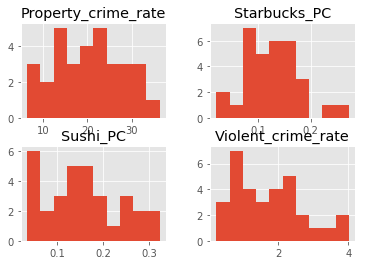

In [9]:
viz = df[['Violent_crime_rate','Property_crime_rate','Sushi_PC','Starbucks_PC']]
viz.hist()
plt.show()

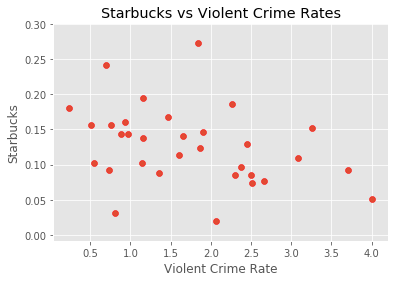

In [13]:
#d = pd.read_csv('sealevel.csv')
VC = df['Violent_crime_rate']
SB = df['Starbucks_PC']
plt.scatter(VC, SB, edgecolors='r')
plt.xlabel('Violent Crime Rate')
plt.ylabel('Starbucks')
plt.title('Starbucks vs Violent Crime Rates')
plt.show()

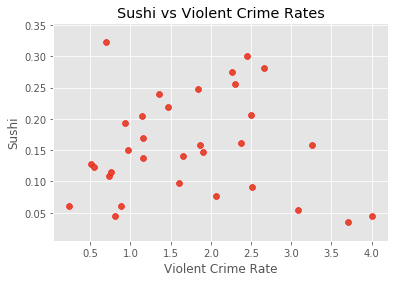

In [14]:
#d = pd.read_csv('sealevel.csv')
VC = df['Violent_crime_rate']
SU = df['Sushi_PC']
plt.scatter(VC, SU, edgecolors='r')
plt.xlabel('Violent Crime Rate')
plt.ylabel('Sushi')
plt.title('Sushi vs Violent Crime Rates')
plt.show()

In [ ]:
# Now lets compare using property crimes 

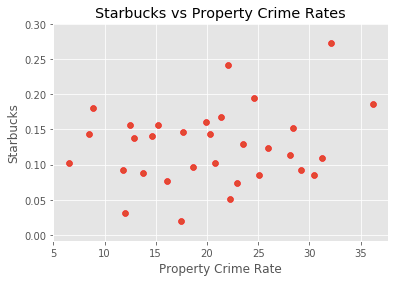

In [15]:
#d = pd.read_csv('sealevel.csv')
VC = df['Property_crime_rate']
SB = df['Starbucks_PC']
plt.scatter(VC, SB, edgecolors='r')
plt.xlabel('Property Crime Rate')
plt.ylabel('Starbucks')
plt.title('Starbucks vs Property Crime Rates')
plt.show()

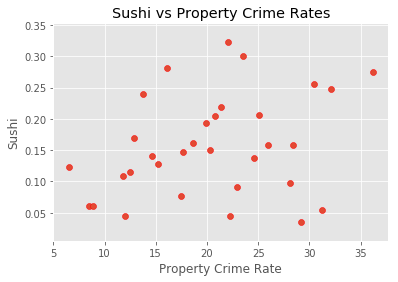

In [16]:
#d = pd.read_csv('sealevel.csv')
VC = df['Property_crime_rate']
SU = df['Sushi_PC']
plt.scatter(VC, SU, edgecolors='r')
plt.xlabel('Property Crime Rate')
plt.ylabel('Sushi')
plt.title('Sushi vs Property Crime Rates')
plt.show()

# Linear Regression

In [11]:
dfL = df

In [14]:
dfL.head()

,Unnamed: 0,City,Sushi_Count,Unnamed: 0.1,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude,Starbucks_PC,Sushi_PC
0,0,Aliso Viejo,3,0,7,48999,43,0.88,415,8.47,33.576138,-117.725812,0.142860,0.061226
1,1,Anaheim,12,1,32,344526,1279,3.71,10070,29.23,33.834752,-117.911732,0.092881,0.034830
2,2,Brea,10,2,11,40253,74,1.84,1292,32.10,33.917044,-117.888856,0.273272,0.248429
3,3,Buena Park,17,3,7,82505,206,2.50,2066,25.04,33.870413,-117.996217,0.084843,0.206048
4,4,Costa Mesa,31,4,21,112635,254,2.26,4079,36.21,33.663339,-117.903317,0.186443,0.275225


In [19]:
cdf = dfL[['Sushi_PC','Starbucks_PC','Property_crime_rate']]
cdf.head(9)

,Sushi_PC,Starbucks_PC,Property_crime_rate
0,0.061226,0.142860,8.47
1,0.034830,0.092881,29.23
2,0.248429,0.273272,32.10
3,0.206048,0.084843,25.04
4,0.275225,0.186443,36.21
5,0.204182,0.102091,20.79
6,0.146319,0.146319,17.68
7,0.158803,0.123513,25.92
8,0.158896,0.151674,28.44


In [20]:
msk = np.random.rand(len(dfL)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [21]:
train.shape

(29, 3)

In [22]:
test.shape

(3, 3)

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Sushi_PC']])
train_y = np.asanyarray(train[['Property_crime_rate']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[35.62278313]]
Intercept:  [14.52901173]


Text(0, 0.5, 'Property Crime Rate')

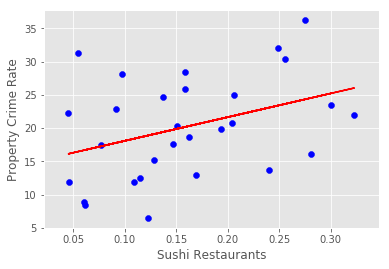

In [24]:
plt.scatter(train.Sushi_PC, train.Property_crime_rate,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Sushi Restaurants")
plt.ylabel("Property Crime Rate")

In [25]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Sushi_PC']])
test_y = np.asanyarray(test[['Property_crime_rate']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 6.46
Residual sum of squares (MSE): 68.77
R2-score: -8.45


#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

# Retry on Starbucks 

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Starbucks_PC']])
train_y = np.asanyarray(train[['Property_crime_rate']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[33.42980263]]
Intercept:  [15.99082143]


Text(0, 0.5, 'Property Crime Rate')

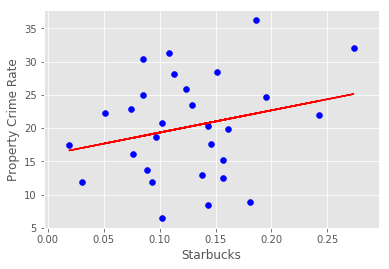

In [27]:
plt.scatter(train.Starbucks_PC, train.Property_crime_rate,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Starbucks")
plt.ylabel("Property Crime Rate")

In [28]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Starbucks_PC']])
test_y = np.asanyarray(test[['Property_crime_rate']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 5.48
Residual sum of squares (MSE): 46.52
R2-score: -42.16


# Multiple Linear Regression

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Starbucks_PC','Sushi_PC']])
y = np.asanyarray(train[['Property_crime_rate']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[16.17611568 31.17927569]]


In [30]:
y_hat= regr.predict(test[['Starbucks_PC','Sushi_PC']])
x = np.asanyarray(test[['Starbucks_PC','Sushi_PC']])
y = np.asanyarray(test[['Property_crime_rate']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 70.04
Variance score: -0.97


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.


# Conclusion - there is not a very close coorelation between Starbucks and/or Sushi restaurants

# Mapping Section

In [32]:
data = pd.DataFrame(df, columns = ['City','latitude','longtitude','Property_crime_rate','City']) #[:50]  <-this kind of slice is useful for developing a map
data.head()


,City,latitude,longtitude,Property_crime_rate,City
0,Aliso Viejo,33.576138,-117.725812,8.47,Aliso Viejo
1,Anaheim,33.834752,-117.911732,29.23,Anaheim
2,Brea,33.917044,-117.888856,32.10,Brea
3,Buena Park,33.870413,-117.996217,25.04,Buena Park
4,Costa Mesa,33.663339,-117.903317,36.21,Costa Mesa


In [33]:
data = pd.DataFrame(df, columns = ['City','latitude','longtitude','Property_crime_rate','City']) #[:50]  <-this kind of slice is useful for developing a map
#data.head()

#create a map for the PropertyCrimeRate
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longtitude],
                        radius=2,
                        weight= point.Property_crime_rate,
                        label=point.City,
                        fill_opacity=.5,
                        color='blue'
                       ).add_to(this_map)

#use df.apply(,axis=1) to iterate through every row in your dataframe
data.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

this_map


In [18]:
data = pd.DataFrame(df, columns = ['City','latitude','longtitude','Violent_crime_rate','City']) #[:50]  <-this kind of slice is useful for developing a map
#data.head()

#create a map for the PropertyCrimeRate
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longtitude],
                        radius=2,
                        weight=point.Violent_crime_rate*10,
                        label=point.City,
                        fill_opacity=.5,
                        color='blue'
                       ).add_to(this_map)

#use df.apply(,axis=1) to iterate through every row in your dataframe
data.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

this_map



In [34]:
data = pd.DataFrame(df, columns = ['City','latitude','longtitude','Starbucks_PC','Sushi_PC','City']) 
data['Sushi_Starbucks'] = (data['Sushi_PC']+data['Sushi_PC'])*50


#create a map for the PropertyCrimeRate
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longtitude],
                        radius=2,
                        weight=point.Sushi_Starbucks,
                        label=point.City,
                        fill_opacity=.5,
                        color='blue'
                       ).add_to(this_map)

#use df.apply(,axis=1) to iterate through every row in your dataframe
data.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

this_map

In [20]:
data = pd.DataFrame(df, columns = ['City','latitude','longtitude','Starbucks_PC','Sushi_PC','City']) 
data['Sushi_Starbucks'] = (data['Sushi_PC']+data['Sushi_PC'])*10
data.head()




,City,latitude,longtitude,Starbucks_PC,Sushi_PC,City,Sushi_Starbucks
0,Aliso Viejo,33.576138,-117.725812,0.142860,0.061226,Aliso Viejo,1.224515
1,Anaheim,33.834752,-117.911732,0.092881,0.034830,Anaheim,0.696609
2,Brea,33.917044,-117.888856,0.273272,0.248429,Brea,4.968574
3,Buena Park,33.870413,-117.996217,0.084843,0.206048,Buena Park,4.120962
4,Costa Mesa,33.663339,-117.903317,0.186443,0.275225,Costa Mesa,5.504506


# Grouping Clusters of similar Cities

In [35]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)


In [22]:
df.head()

,City,Sushi_Count,StarBucks_Count,Population,Violent_Crimes,Violent_crime_rate,Property_crimes,Property_crime_rate,latitude,longtitude,Starbucks_PC,Sushi_PC
0,Aliso Viejo,3,7,48999,43,0.88,415,8.47,33.576138,-117.725812,0.142860,0.061226
1,Anaheim,12,32,344526,1279,3.71,10070,29.23,33.834752,-117.911732,0.092881,0.034830
2,Brea,10,11,40253,74,1.84,1292,32.10,33.917044,-117.888856,0.273272,0.248429
3,Buena Park,17,7,82505,206,2.50,2066,25.04,33.870413,-117.996217,0.084843,0.206048
4,Costa Mesa,31,21,112635,254,2.26,4079,36.21,33.663339,-117.903317,0.186443,0.275225


In [36]:
dataGroup = pd.DataFrame(df, columns = ['City','Population','Violent_crime_rate','Property_crime_rate','Starbucks_PC','Sushi_PC'])

In [37]:
dataGroup.head()

,City,Population,Violent_crime_rate,Property_crime_rate,Starbucks_PC,Sushi_PC
0,Aliso Viejo,48999,0.88,8.47,0.142860,0.061226
1,Anaheim,344526,3.71,29.23,0.092881,0.034830
2,Brea,40253,1.84,32.10,0.273272,0.248429
3,Buena Park,82505,2.50,25.04,0.084843,0.206048
4,Costa Mesa,112635,2.26,36.21,0.186443,0.275225


In [38]:
from sklearn.preprocessing import StandardScaler
X = dataGroup.values[:,1:]

In [39]:
X = dataGroup.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-5.30087430e-01, -8.91037919e-01, -1.59525375e+00,
         2.97931369e-01, -1.19932708e+00],
       [ 3.12884800e+00,  2.06906457e+00,  1.19336549e+00,
        -6.23674029e-01, -1.53101719e+00],
       [-6.38372119e-01,  1.13095789e-01,  1.57888270e+00,
         2.70270865e+00,  1.15311529e+00],
       [-1.15247870e-01,  8.03437713e-01,  6.30537234e-01,
        -7.71892078e-01,  6.20549697e-01],
       [ 2.57793254e-01,  5.52404286e-01,  2.13096483e+00,
         1.10159602e+00,  1.48984849e+00],
       [-5.30372194e-01, -6.19085040e-01,  5.96493848e-02,
        -4.53850022e-01,  5.97095031e-01],
       [-7.13661302e-01,  1.75854145e-01, -3.58106194e-01,
         3.61707024e-01, -1.30027122e-01],
       [-4.35062849e-01,  1.44474967e-01,  7.48744600e-01,
        -5.88189042e-02,  2.68546248e-02],
       [ 5.77472041e-01,  1.59837690e+00,  1.08724751e+00,
         4.60456573e-01,  2.80284887e-02],
       [ 1.03091572e+00,  8.13897439e-01,  3.48451473e-01,
        -9.67191975e-01

In [40]:
X

array([[48999, 0.88, 8.47, 0.14286005836853813, 0.06122573930080205],
       [344526, 3.71, 29.23, 0.09288123392719272, 0.03483046272269727],
       [40253, 1.84, 32.1, 0.2732715573994485, 0.24842868854495317],
       [82505, 2.5, 25.04, 0.08484334282770742, 0.20604811829586087],
       [112635, 2.26, 36.21, 0.18644293514449325, 0.2752252852132996],
       [48976, 1.14, 20.79, 0.10209081999346618, 0.20418163998693237],
       [34172, 1.9, 17.68, 0.14631862343439075, 0.14631862343439075],
       [56674, 1.87, 25.92, 0.12351342767406571, 0.1588029784380845],
       [138455, 3.26, 28.44, 0.15167382904192697, 0.1588963923296378],
       [175079, 2.51, 22.94, 0.0742521947235248, 0.09138731658279976],
       [194677, 1.61, 28.1, 0.1130076999337364, 0.09759755903368143],
       [217528, 0.51, 15.19, 0.15630171748004856, 0.12871906145415762],
       [61731, 2.38, 18.63, 0.09719589833309034, 0.1619931638884839],
       [23283, 2.45, 23.54, 0.12884937508053085, 0.300648541854572],
       [31090,

In [41]:
from sklearn.cluster import KMeans

In [42]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 1 0 3 0 3 3 3 1 1 1 2 3 3 0 2 2 3 3 2 0 2 3 2 2 2 1 0 3 0 1 2]


In [43]:
dataGroup["Labels"] = labels
dataGroup.head(5)

,City,Population,Violent_crime_rate,Property_crime_rate,Starbucks_PC,Sushi_PC,Labels
0,Aliso Viejo,48999,0.88,8.47,0.142860,0.061226,2
1,Anaheim,344526,3.71,29.23,0.092881,0.034830,1
2,Brea,40253,1.84,32.10,0.273272,0.248429,0
3,Buena Park,82505,2.50,25.04,0.084843,0.206048,3
4,Costa Mesa,112635,2.26,36.21,0.186443,0.275225,0


In [44]:
dataGroup

,City,Population,Violent_crime_rate,Property_crime_rate,Starbucks_PC,Sushi_PC,Labels
0,Aliso Viejo,48999,0.88,8.47,0.142860,0.061226,2
1,Anaheim,344526,3.71,29.23,0.092881,0.034830,1
2,Brea,40253,1.84,32.10,0.273272,0.248429,0
3,Buena Park,82505,2.50,25.04,0.084843,0.206048,3
4,Costa Mesa,112635,2.26,36.21,0.186443,0.275225,0
5,Cypress,48976,1.14,20.79,0.102091,0.204182,3
6,Dana Point,34172,1.90,17.68,0.146319,0.146319,3
7,Fountain Valley,56674,1.87,25.92,0.123513,0.158803,3
8,Fullerton,138455,3.26,28.44,0.151674,0.158896,1
9,Garden Grove,175079,2.51,22.94,0.074252,0.091387,1


## Here are the 4 groups

In [45]:
dataGroup.groupby('Labels').mean()

,Population,Violent_crime_rate,Property_crime_rate,Starbucks_PC,Sushi_PC
Labels,,,,,
0,62238.0,1.391667,26.043333,0.204258,0.232801
1,212854.5,3.031667,27.035000,0.098625,0.080372
2,79833.7,0.826000,12.322000,0.128471,0.110207
3,48913.7,2.062000,20.938000,0.095249,0.203220


# Now we can create a profile for each group, considering the common characteristics of each cluster.

### Group 0- Medium Population, Medium crime, and lots of Starbucks and Sushi
### Group 1 - High population, higest crime, Lowest Starbucks and Sushi
### Group 2 - Medium population, lowest crime, medium Starbucks and Sushi
### Group 3 - Lowest population, Medium crime, Low Starbucks and high Sushi

In [46]:
dataGroup.loc[dataGroup['Labels']==3]  #<-- all returned

,City,Population,Violent_crime_rate,Property_crime_rate,Starbucks_PC,Sushi_PC,Labels
3,Buena Park,82505,2.50,25.04,0.084843,0.206048,3
5,Cypress,48976,1.14,20.79,0.102091,0.204182,3
6,Dana Point,34172,1.90,17.68,0.146319,0.146319,3
7,Fountain Valley,56674,1.87,25.92,0.123513,0.158803,3
12,La Habra,61731,2.38,18.63,0.097196,0.161993,3
13,Laguna Beach,23283,2.45,23.54,0.128849,0.300649,3
17,Lake Forest,79166,1.35,13.74,0.088422,0.240002,3
18,Los Alamitos,11728,2.30,30.44,0.085266,0.255798,3
22,Placentia,51778,2.07,17.50,0.019313,0.077253,3
28,Stanton,39124,2.66,16.10,0.076679,0.281157,3
